# ‘Portugal Bank Marketing’ dataset:
### Bank client data:
**1. age (numeric)**

**2. job: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")**

**3. marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)**

**4. education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")**

**5 default: has credit in default? (categorical: "no","yes","unknown")**

**6 housing: has housing loan? (categorical: "no","yes","unknown")**

**7 loan: has personal loan? (categorical: "no","yes","unknown")**


### Related with the last contact of the current campaign:
**8 contact: contact communication type (categorical: "cellular","telephone")**

**9 month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")**

**10 dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")**

**11 duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**


### Other attributes:
**12 campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)**

**13 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)**

**14 previous: number of contacts performed before this campaign and for this client (numeric)**

**15 poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")**

### Social and economic context attributes
**16 emp.var.rate: employment variation rate - quarterly indicator (numeric)**

**17 cons.price.idx: consumer price index - monthly indicator (numeric)**

**18 cons.conf.idx: consumer confidence index - monthly indicator (numeric)**

**19 concave points_se: standard error for number of concave portions of the contour**

**20 euribor3m: euribor 3 month rate - daily indicator (numeric)**

**21 nr.employed: number of employees - quarterly indicator (numeric)**

### Output variable (desired target):
**22 y: has the client subscribed a term deposit? (binary: "yes","no")**


# Loading Libraries

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
from collections import Counter

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Setting options

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Read data

In [3]:
# read the excel data file 
bank = pd.read_csv('C://Users//ppluc/Downloads/Dataset/Bank/bank.csv', sep=';')

# display the top 5 rows of the dataframe
bank.head()

# Note: To display more rows, example 10, use head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Understand the Data

In [4]:
bank.shape

(41188, 21)

In [5]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
bank.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
understand = pd.concat([bank.dtypes,bank.nunique(),bank.isnull().sum()], axis=1)
understand.columns = ['Data type', 'Unique values', 'Null Values']

understand


,Data type,Unique values,Null Values
age,int64,78,0
job,object,12,0
marital,object,4,0
education,object,8,0
default,object,3,0
housing,object,3,0
loan,object,3,0
contact,object,2,0
month,object,10,0
day_of_week,object,5,0


In [9]:
for i in bank.columns:
    if bank[i].dtypes == 'object':
        print(i.upper())
        print(bank[i].unique())
        print(bank[i].value_counts(),'\n\n\n')
    else:
        print(i.upper())
        print(bank[i].unique(),'\n\n\n')

AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 



JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 



MARITAL
['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 



EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degre

In [10]:
bank['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

# separating numeric and categorical

In [11]:
df_num = bank.select_dtypes(np.number)
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
df_cat = bank.select_dtypes('object')
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

# Analysis of Data

# Univariate


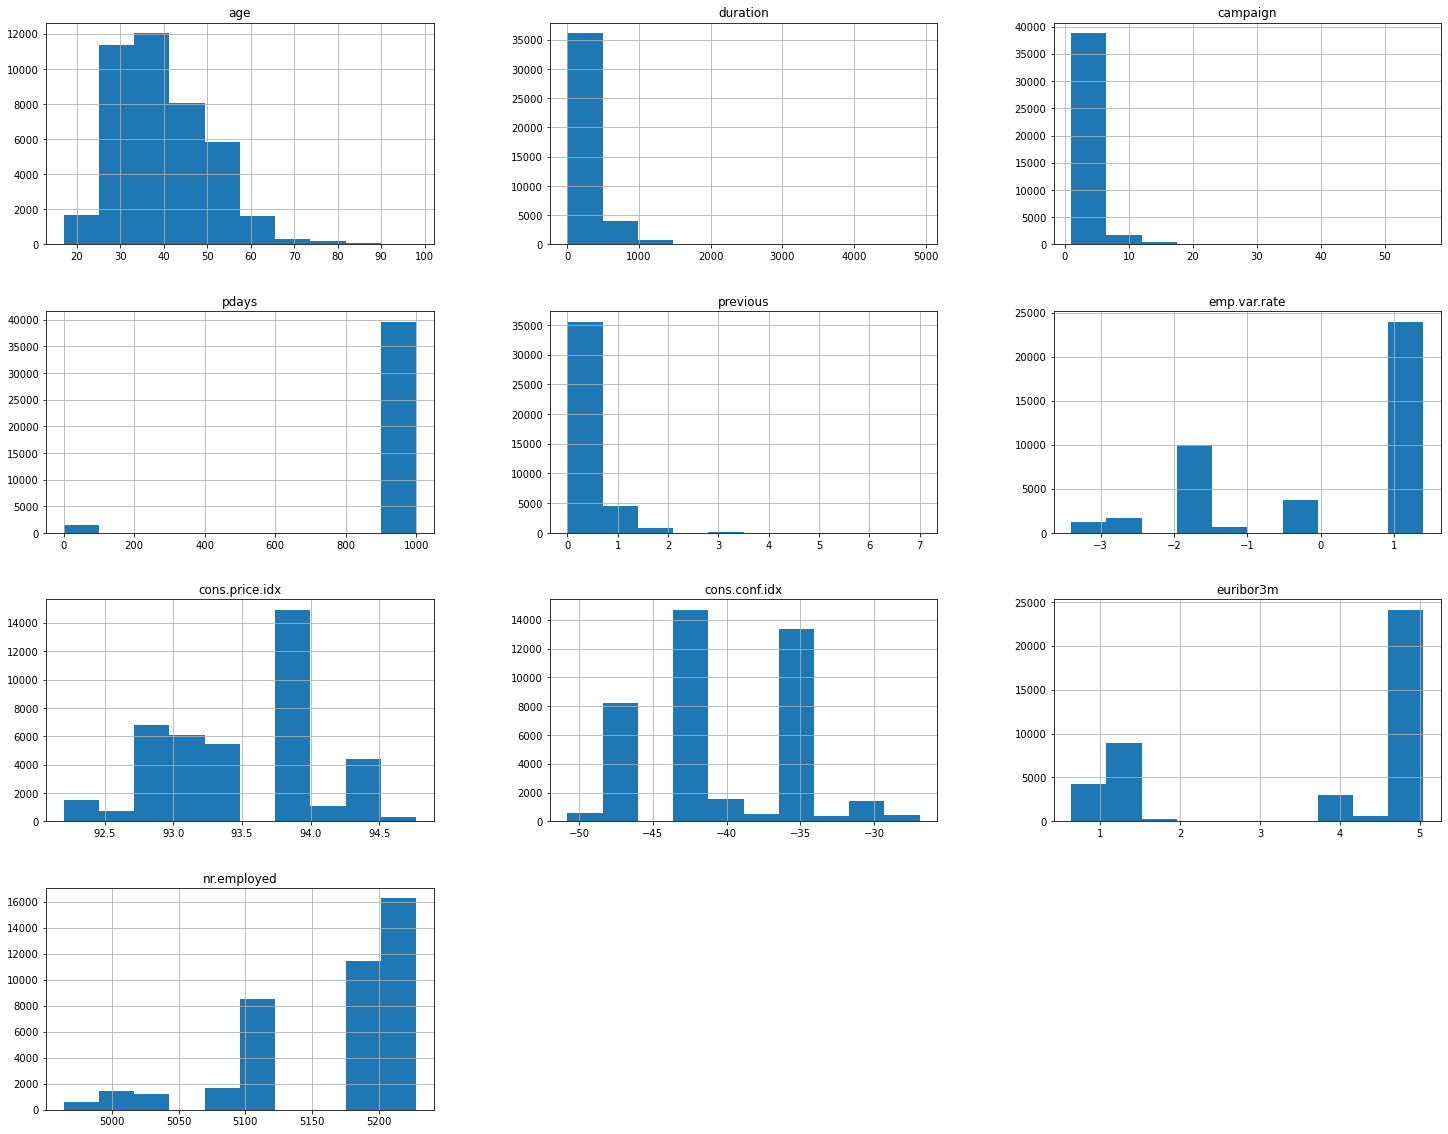

In [13]:
fig = df_num.hist(figsize = (25,20))


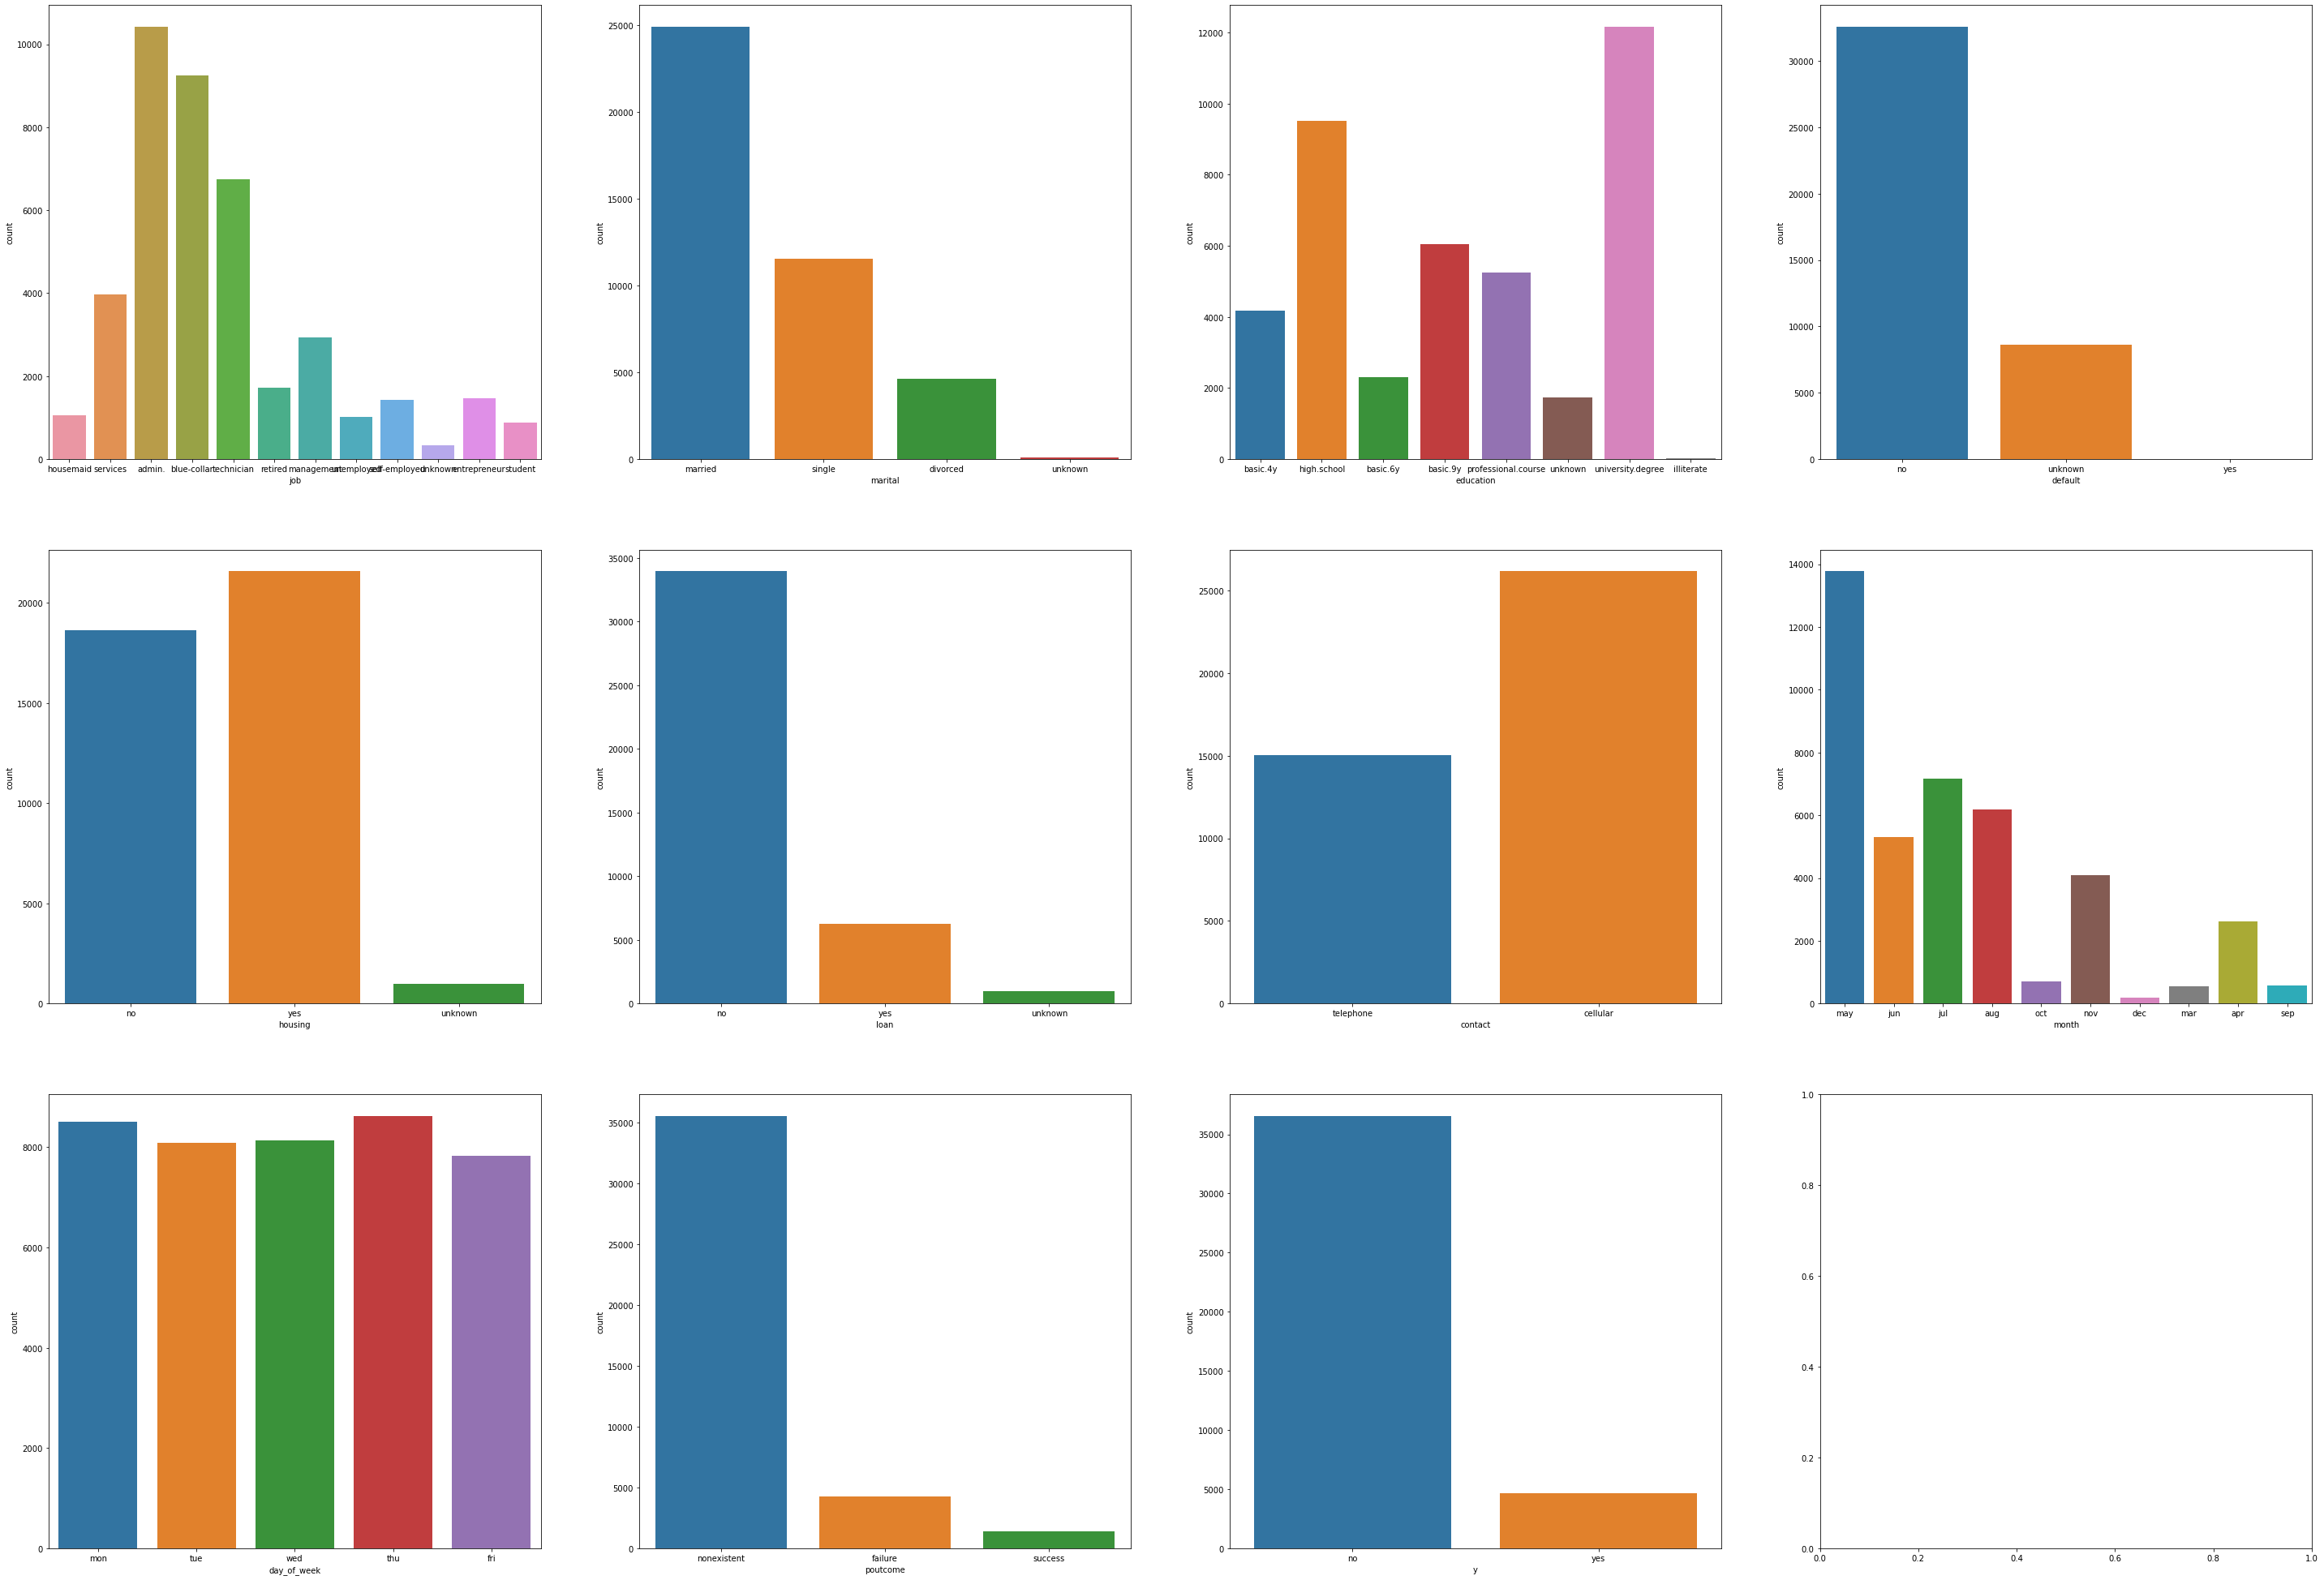

In [14]:
categorical = df_cat.columns
fig, ax = plt.subplots(3, 4, figsize=(50,35))
for i, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_cat[i], ax=subplot)
plt.show()

<AxesSubplot:xlabel='poutcome', ylabel='count'>

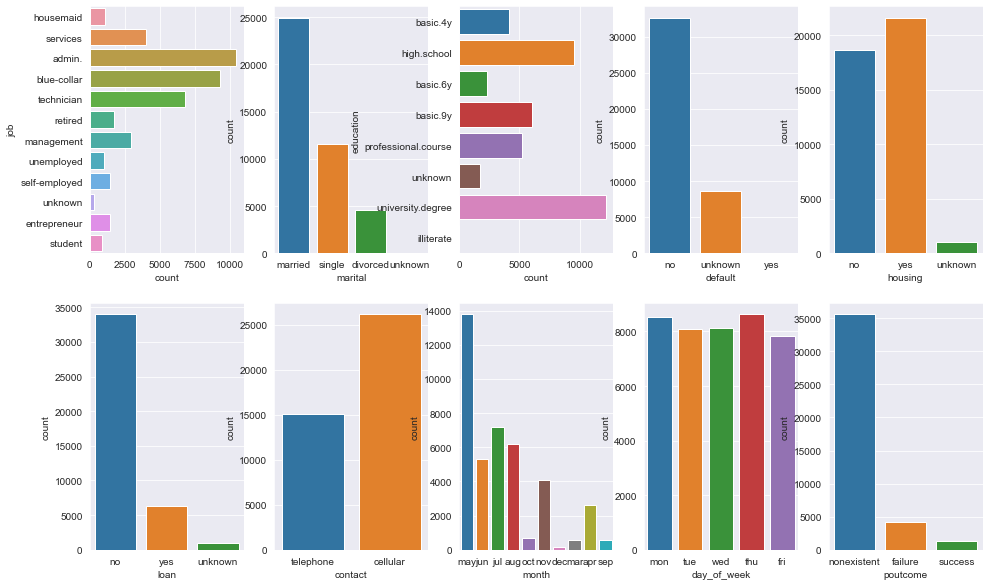

In [15]:
# visualizing count of Categorical Features
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 5, figsize=(16, 10))
sns.countplot(y=bank['job'], ax=axes[0,0]) # plotting for job count
sns.countplot('marital', data=bank, ax=axes[0,1]) # plotting for marital count
sns.countplot(y=bank['education'], ax=axes[0,2]) # plotting for education count
sns.countplot('default', data=bank, ax=axes[0,3]) # plotting for default count
sns.countplot('housing', data=bank, ax=axes[0,4]) # plotting for housing count
sns.countplot('loan', data=bank, ax=axes[1,0]) # plotting for loan count
sns.countplot('contact', data=bank, ax=axes[1,1]) # plotting for contact count
sns.countplot('month', data=bank, ax=axes[1,2]) # plotting for month count
sns.countplot('day_of_week', data=bank, ax=axes[1,3]) # plotting for day_of_week count
sns.countplot('poutcome', data=bank, ax=axes[1,4]) # plotting for poutcome count

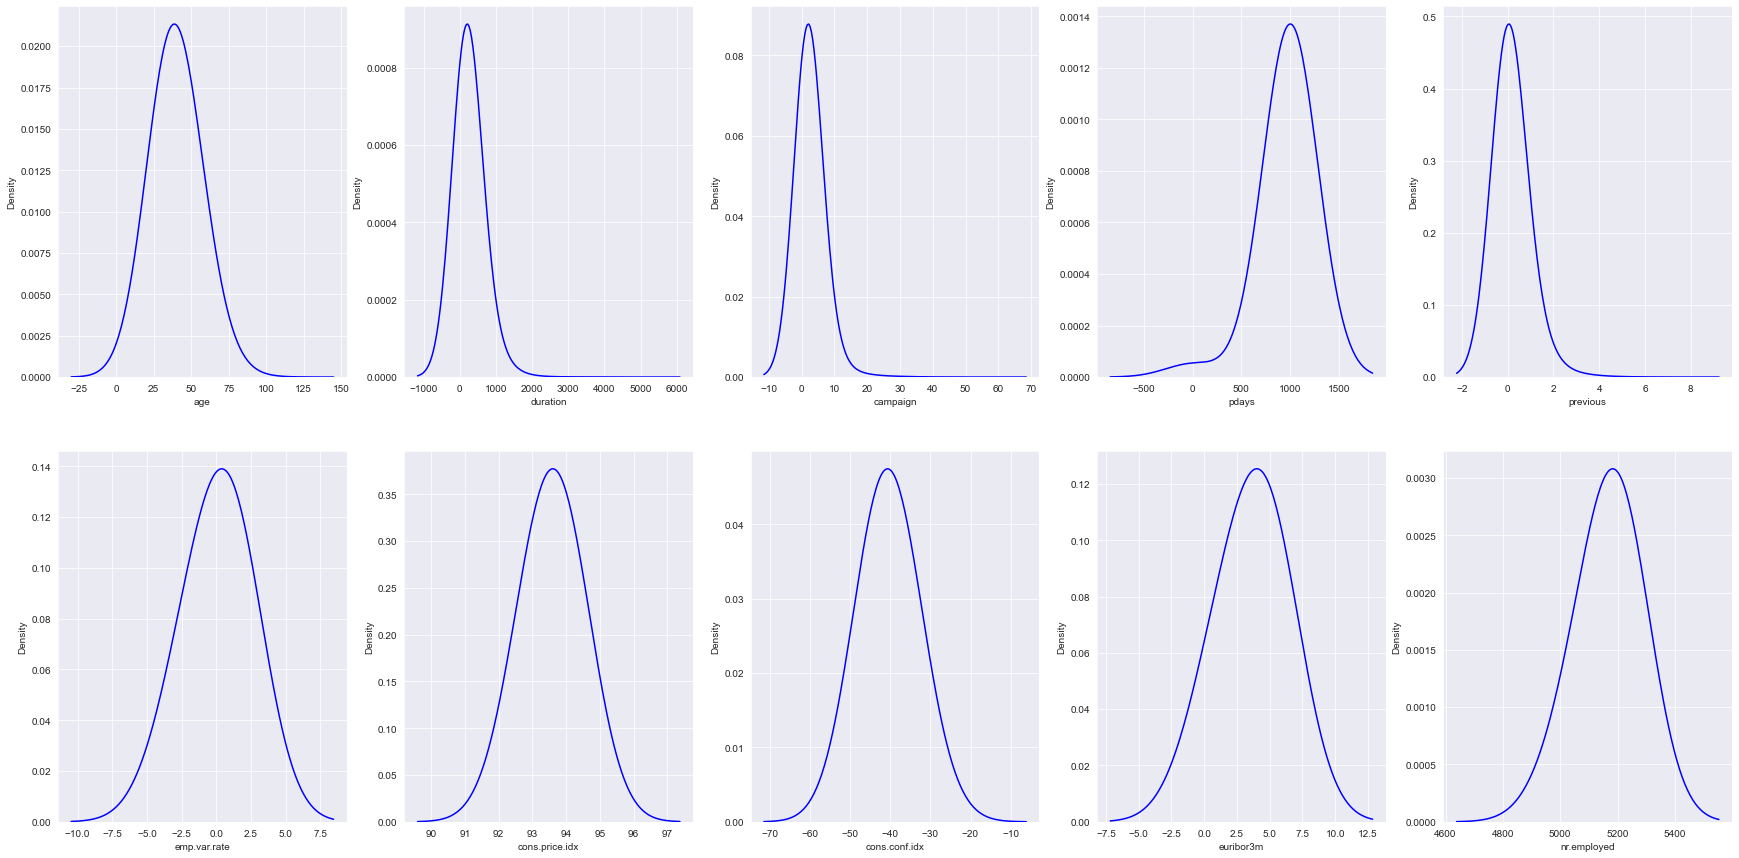

In [16]:
#visualising numerical features distributions
fig,ax=plt.subplots(nrows = 2, ncols = 5,figsize=(30,15))

for i,subplot in zip(list(df_num),ax.flatten()):
    sns.kdeplot(df_num[i], bw=1.5, color='b', ax=subplot)
plt.show()

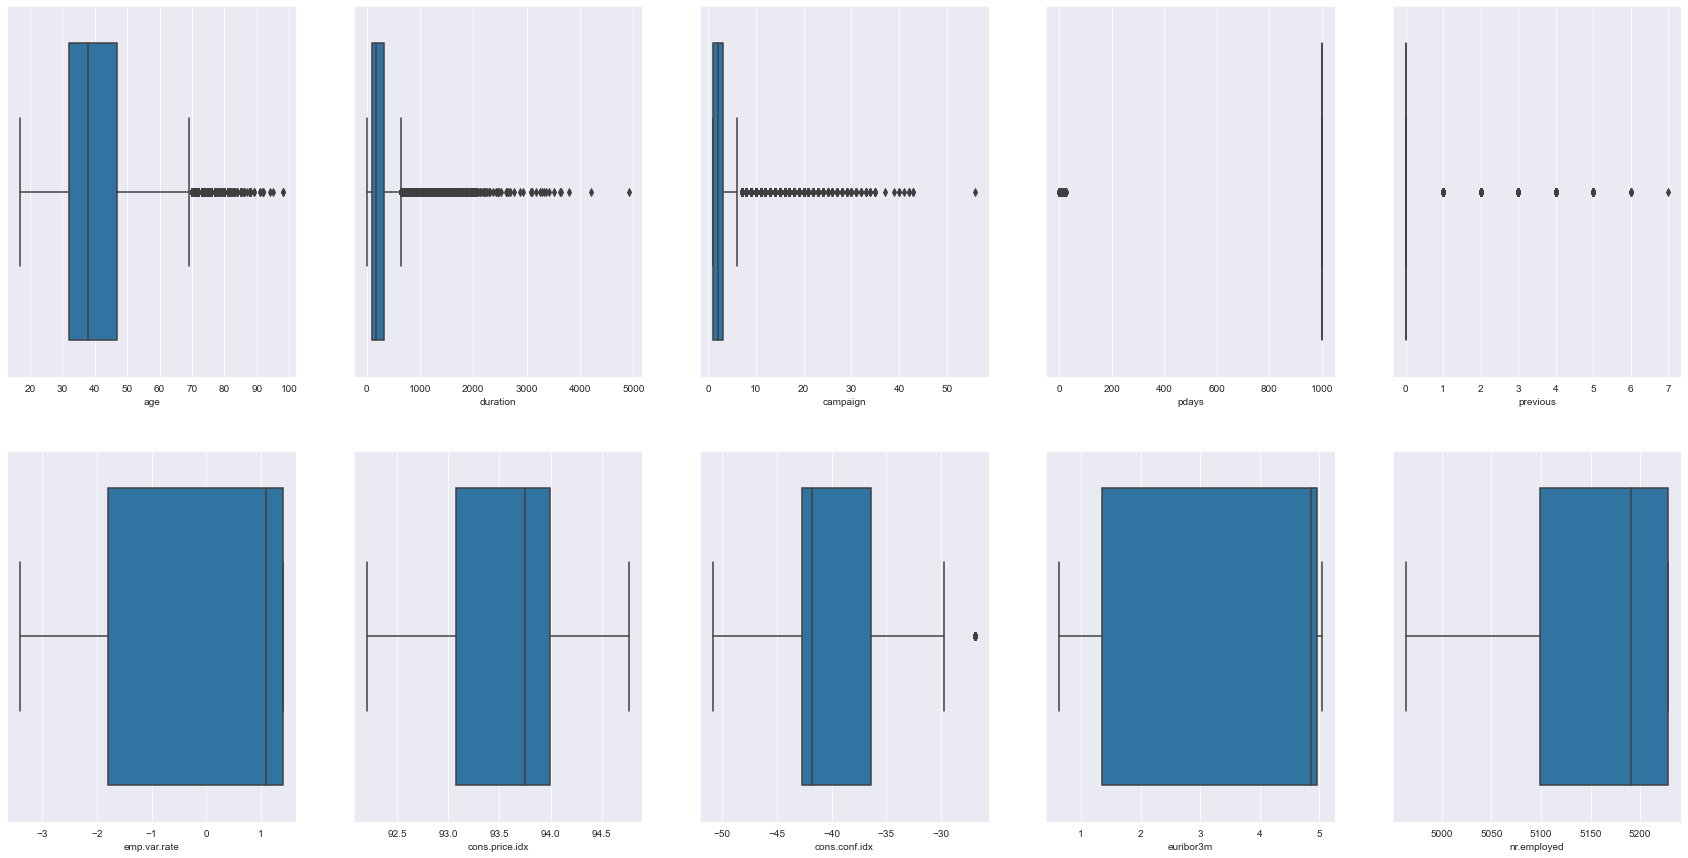

In [17]:
#checking outliers--- Numerical features
fig,ax = plt.subplots(nrows = 2, ncols = 5, figsize=(30,15))
for i,subplot in zip(list(df_num), ax.flatten()):
    sns.boxplot(x=df_num[i], ax=subplot)
plt.show()

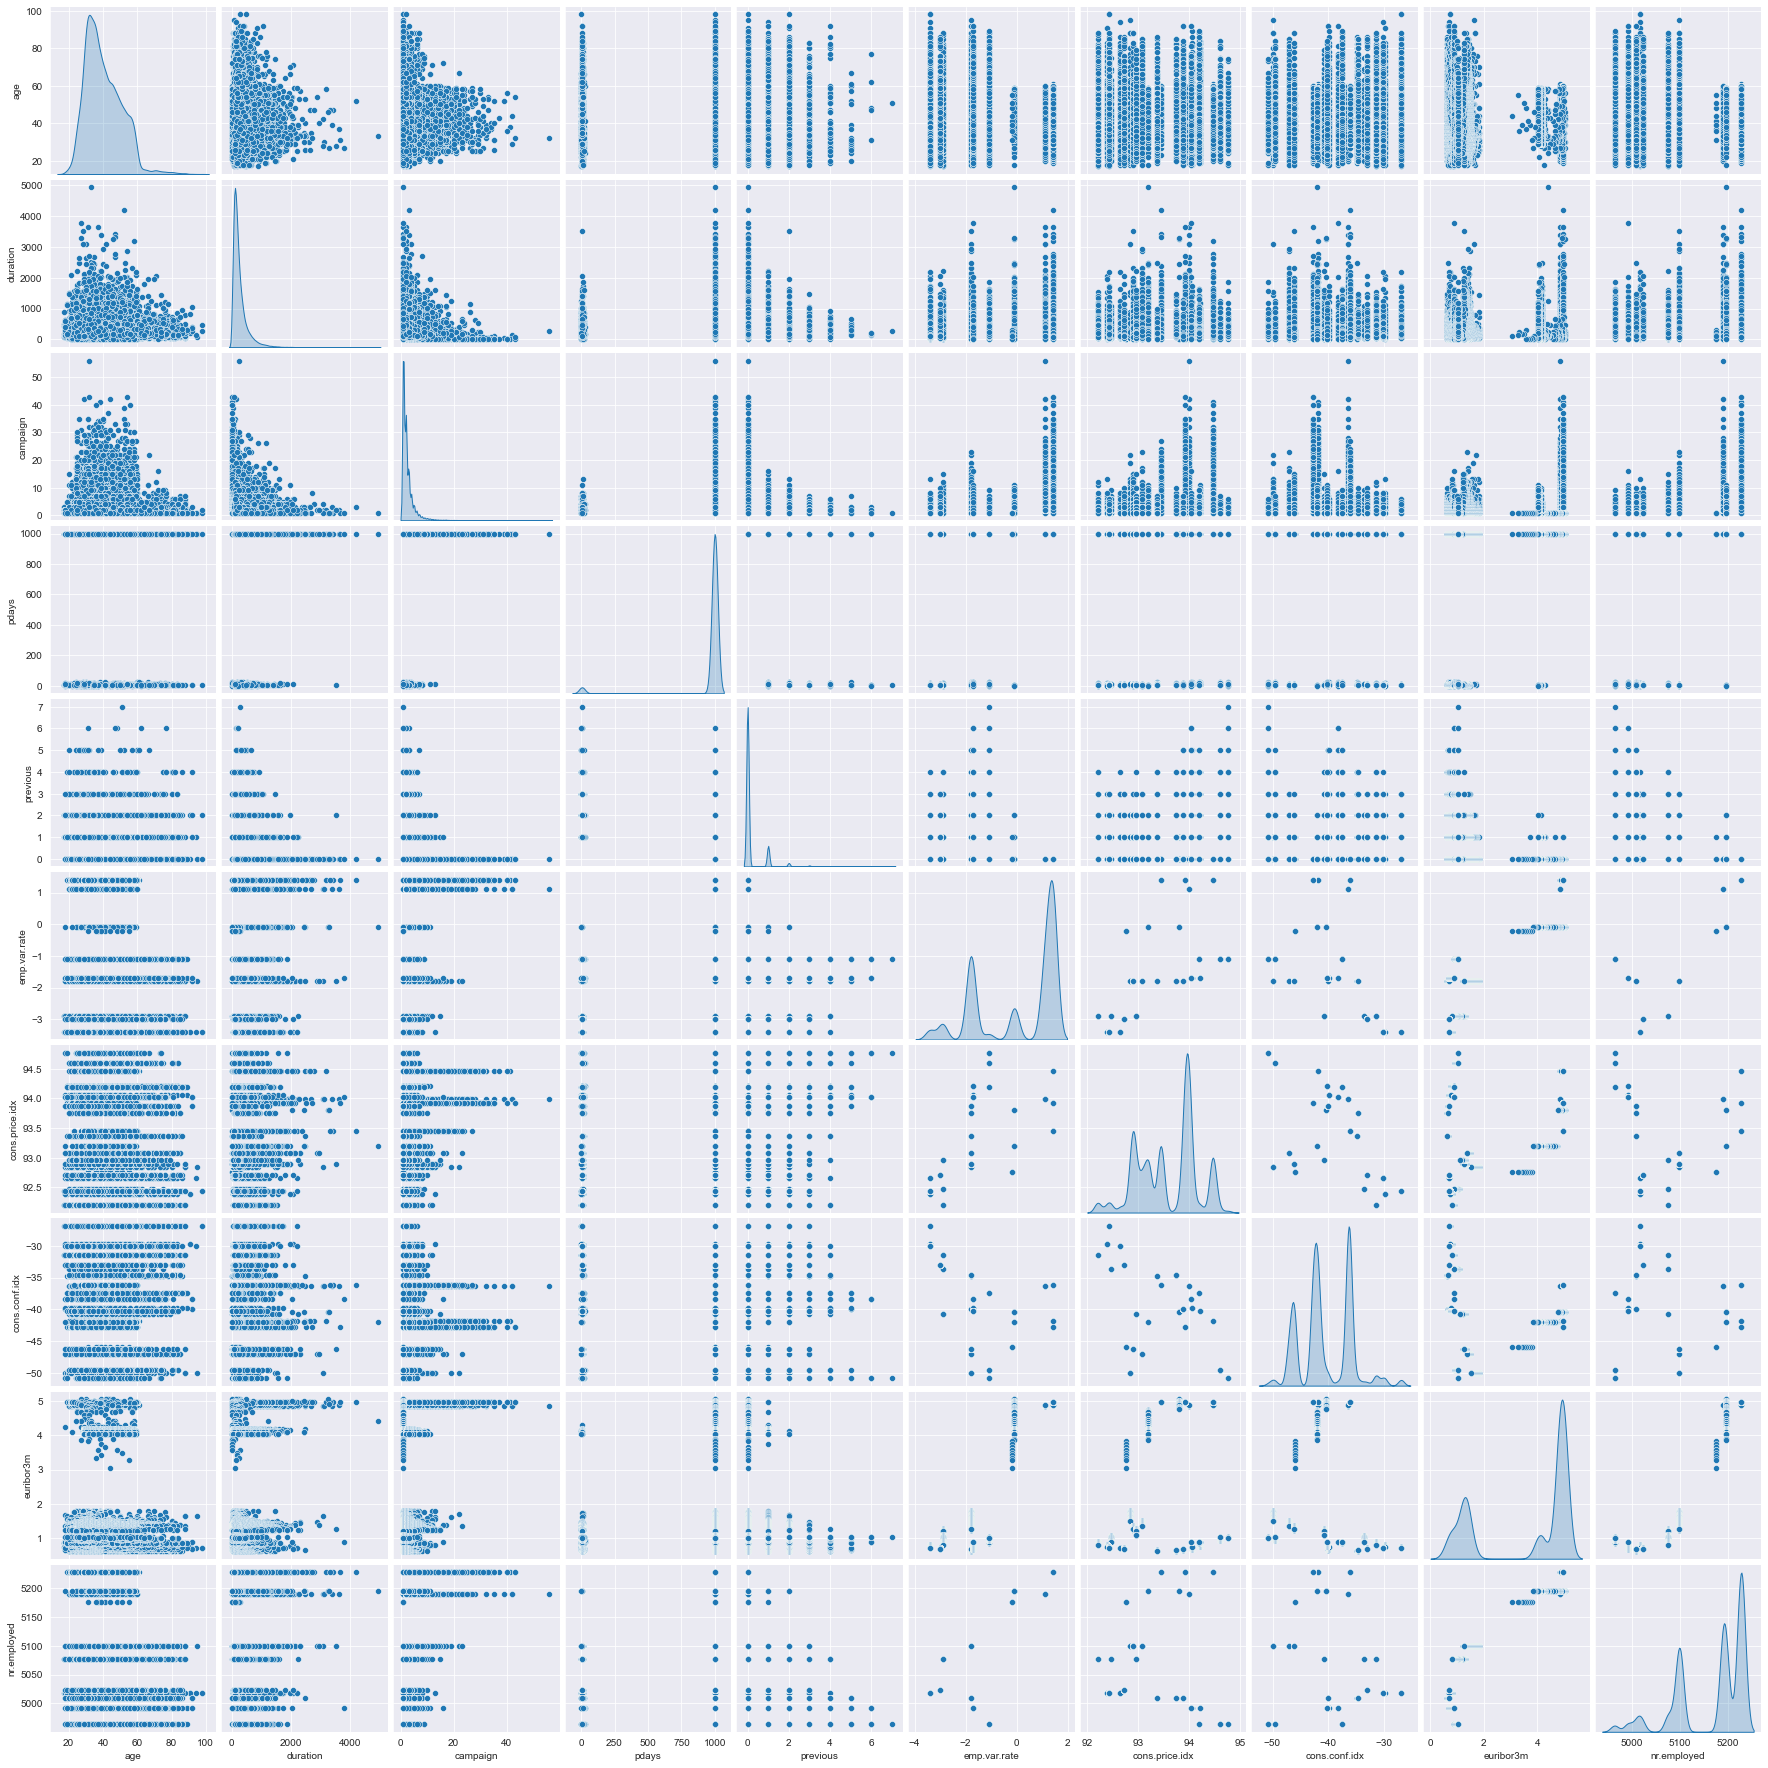

In [18]:
column = bank[df_num.columns]

sns.pairplot(column, kind = 'scatter', diag_kind='kde')
plt.show()

# Bivariate

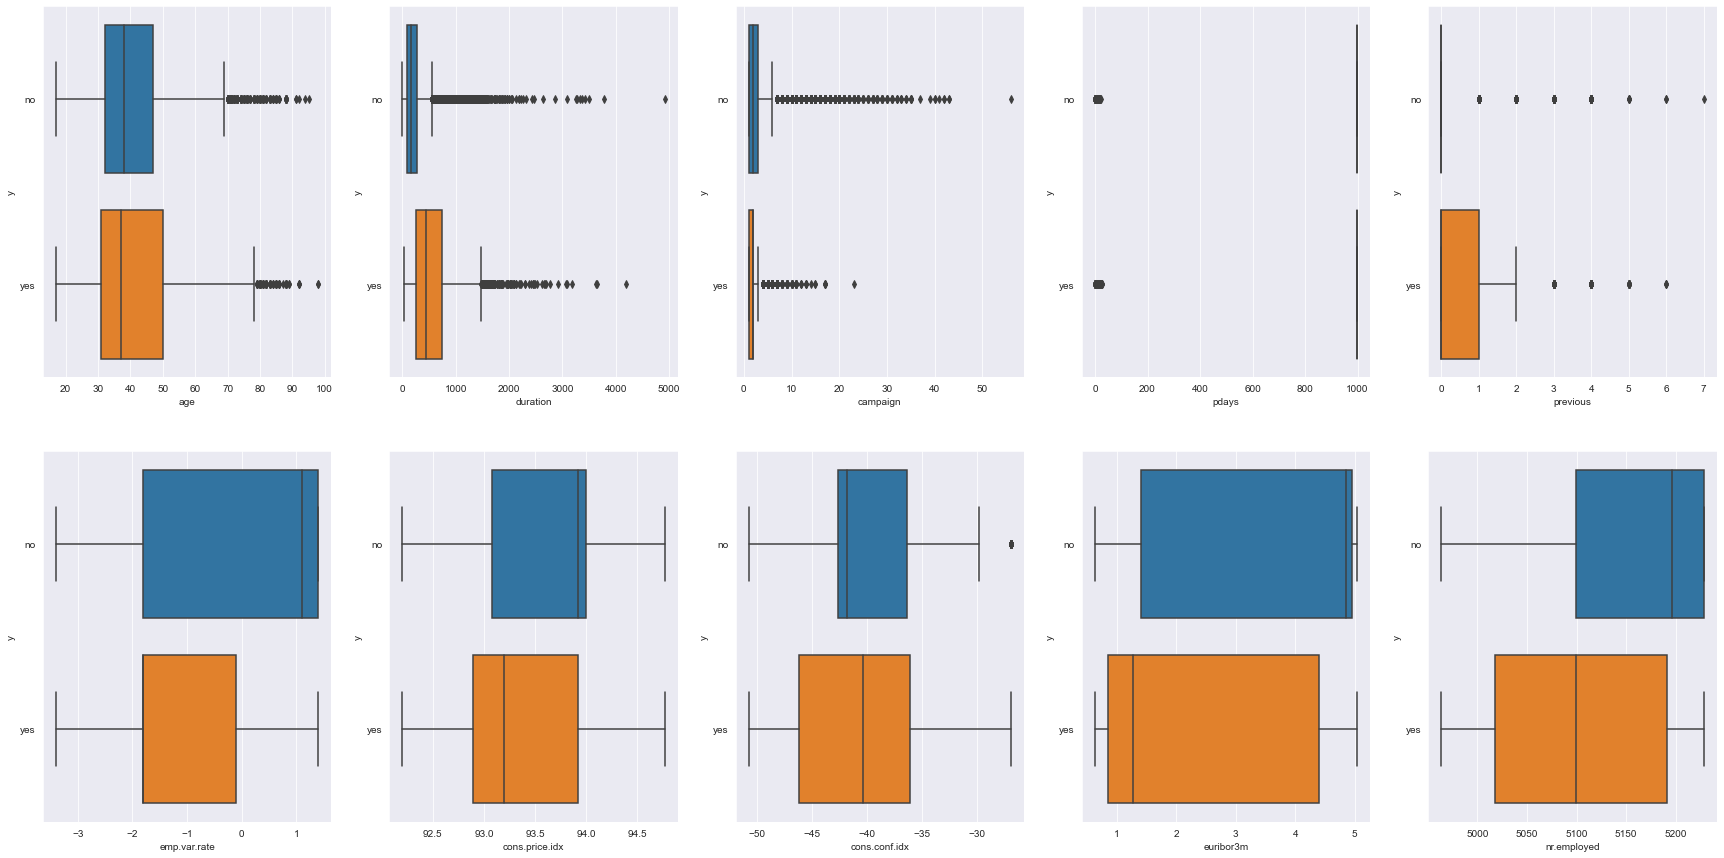

In [19]:
#checking outliers--- target variable Vs Numerical features
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (30,15))
for i,subplot in zip(list(df_num), ax.flatten()):
    sns.boxplot(x = df_num[i], y = bank['y'], ax = subplot)
plt.show()


# Target Variable

In [20]:
class_freq = bank['y'].value_counts()
class_freq

no     36548
yes     4640
Name: y, dtype: int64

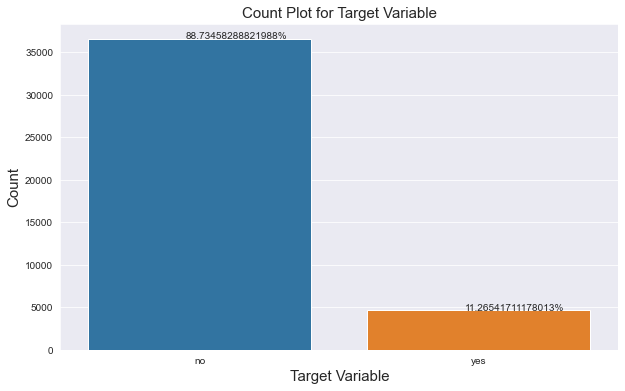

In [21]:
# plcountplote countplot of the variable 'target'
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(x = bank['y'])

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = bank['y'].value_counts()[0] + 30, s = str(class_freq[0] * 100 / len(bank['y'])) + '%')
plt.text(x = 0.95, y = bank['y'].value_counts()[1] + 25, s = str(class_freq[1] * 100 / len(bank['y'])) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

Here we can understand data is highly imbalanced

# applying label Encoder on Target Variable

In [22]:
# importing LabelEncoder algorithm from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# calling the function
le = LabelEncoder()

# fitting and transforming classes of target variable
bank['y'] = le.fit_transform(bank['y'])

In [23]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Missing Value

In [24]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

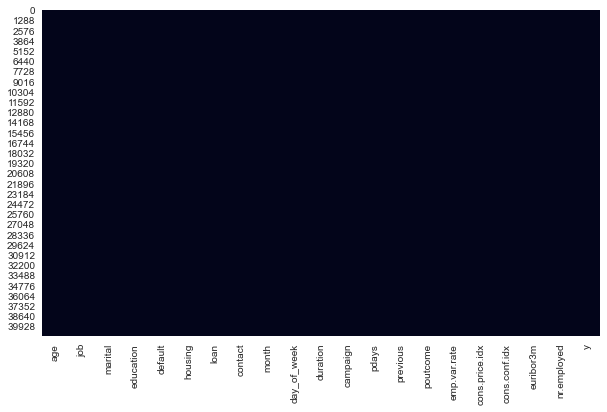

In [25]:
sns.heatmap(bank.isnull(), cbar = False)
plt.show()

# Correlation

In [26]:
corr = bank.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


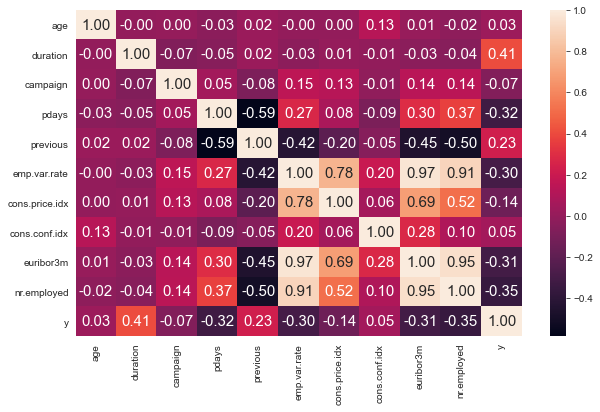

In [27]:
sns.heatmap(corr, annot = True, annot_kws={'size': 15}, fmt = '.2f')
plt.show()

In [28]:
bank.corr().style.background_gradient(cmap = 'coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


# splitting categorical and numerical

In [29]:
df_num = bank.select_dtypes(np.number)

df_cat = bank.select_dtypes('object')

## applying Ordinal encoder on categorical features

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()
df_cat[df_cat.columns] = ord.fit_transform(df_cat)

In [31]:
df = pd.concat([df_num, df_cat], axis = 1)

In [32]:
# splitting data into independent and dependent features
# X is independent feature
X = df.drop('y', axis = 1)

# y is dependent feature
y = df['y']

In [33]:
# storing columns of X in X_col
X_col = X.columns

# Applying Normalization

In [34]:
# importing a algorithm from sklearn.preprocessing library
from sklearn.preprocessing import StandardScaler

# calling StandardScaler() algorithm
sc = StandardScaler()

# fit_transform will transform X (independent) into standardise values
X = sc.fit_transform(X)

In [35]:
X = pd.DataFrame(X, columns = X_col)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622


In [36]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)


X_train  (28831, 20)
X_test  (12357, 20)
y_train  (28831,)
y_test  (12357,)


# Creating Models

In [37]:
#Building models and evaluating metrics

column = ['Model_name', 'Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1-score', "confusion matrix", 'Sensitivity', 'Specificity']

result_tab = pd.DataFrame(columns=column)

models=[LogisticRegression(), AdaBoostClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability=True)]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print('----------',str(i).upper(),'--------')
        print()
        
        method=i
        method.fit(X_train,y_train)
        y_pred = method.predict(X_test)
       
        
        
        pred_prob1 = method.predict_proba(X_test)
        
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        print('Confusion Matrix \n', confusion_mat)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False positve rate (1- Specificity)')
        plt.ylabel('True positive rate (Sensitivity)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1[:,1]),
                    'Precision Score': metrics.precision_score(y_test, y_pred),
                    'Recall Score': metrics.recall_score(y_test, y_pred),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred),
                    "confusion matrix":confusion_matrix(y_pred,y_test),
                    'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab = result_tab.append(modd,ignore_index=True)
        
    return result_tab

---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[10645   860]
 [  290   562]]
classification report:                  precision    recall  f1-score   support

           0       0.97      0.93      0.95     11505
           1       0.40      0.66      0.49       852

    accuracy                           0.91     12357
   macro avg       0.68      0.79      0.72     12357
weighted avg       0.93      0.91      0.92     12357

PPV:  97.34796524919982
NPV:  39.52180028129395


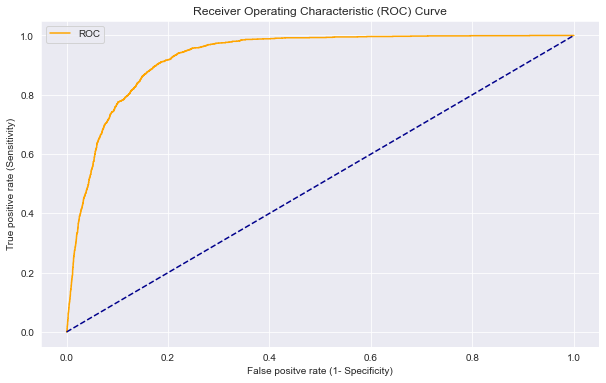


---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[10688   907]
 [  247   515]]
classification report:                  precision    recall  f1-score   support

           0       0.98      0.92      0.95     11595
           1       0.36      0.68      0.47       762

    accuracy                           0.91     12357
   macro avg       0.67      0.80      0.71     12357
weighted avg       0.94      0.91      0.92     12357

PPV:  97.74119798811157
NPV:  36.21659634317862


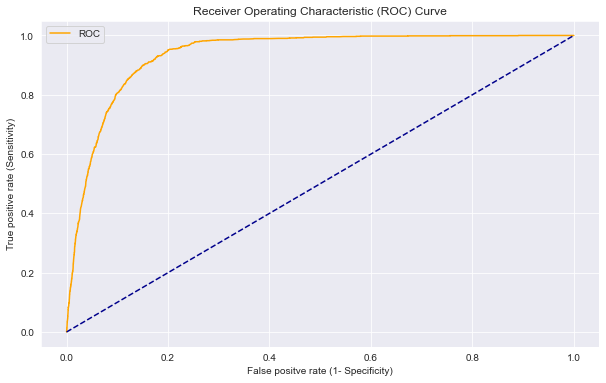


---------- GAUSSIANNB() --------

Confusion Matrix 
 [[9571  599]
 [1364  823]]
classification report:                  precision    recall  f1-score   support

           0       0.88      0.94      0.91     10170
           1       0.58      0.38      0.46      2187

    accuracy                           0.84     12357
   macro avg       0.73      0.66      0.68     12357
weighted avg       0.82      0.84      0.83     12357

PPV:  87.52629172382258
NPV:  57.876230661040786


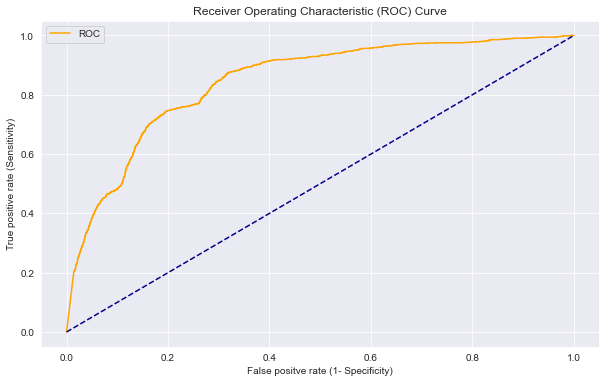


---------- KNEIGHBORSCLASSIFIER() --------

Confusion Matrix 
 [[10559   885]
 [  376   537]]
classification report:                  precision    recall  f1-score   support

           0       0.97      0.92      0.94     11444
           1       0.38      0.59      0.46       913

    accuracy                           0.90     12357
   macro avg       0.67      0.76      0.70     12357
weighted avg       0.92      0.90      0.91     12357

PPV:  96.56149977137632
NPV:  37.76371308016878


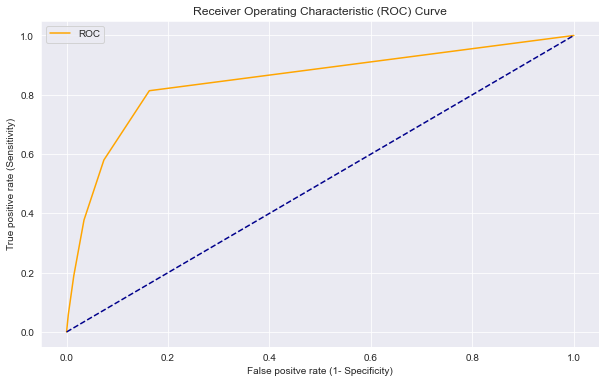


---------- SVC(PROBABILITY=TRUE) --------

Confusion Matrix 
 [[10669   909]
 [  266   513]]
classification report:                  precision    recall  f1-score   support

           0       0.98      0.92      0.95     11578
           1       0.36      0.66      0.47       779

    accuracy                           0.90     12357
   macro avg       0.67      0.79      0.71     12357
weighted avg       0.94      0.90      0.92     12357

PPV:  97.56744398719708
NPV:  36.075949367088604


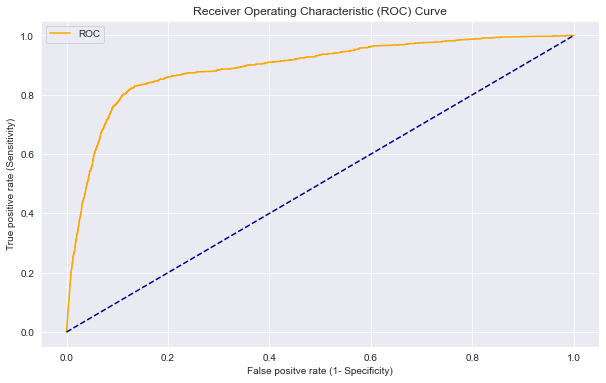

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base_Model,LogisticRegression(),0.928073,0.659624,0.395218,0.906935,0.446559,0.494283,"[[10645, 860], [290, 562]]",92.524989,65.962441
1,Base_Model,AdaBoostClassifier(),0.936526,0.675853,0.362166,0.906612,0.425477,0.471612,"[[10688, 907], [247, 515]]",92.177663,67.585302
2,Base_Model,GaussianNB(),0.844592,0.376315,0.578762,0.841143,0.367927,0.456082,"[[9571, 599], [1364, 823]]",94.110128,37.631459
3,Base_Model,KNeighborsClassifier(),0.847213,0.588171,0.377637,0.897953,0.406552,0.459957,"[[10559, 885], [376, 537]]",92.266690,58.817087
4,Base_Model,SVC(probability=True),0.892614,0.658537,0.360759,0.904912,0.418809,0.466152,"[[10669, 909], [266, 513]]",92.148903,65.853659


In [38]:
func('Base_Model')

In [39]:
result_tab

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base_Model,LogisticRegression(),0.928073,0.659624,0.395218,0.906935,0.446559,0.494283,"[[10645, 860], [290, 562]]",92.524989,65.962441
1,Base_Model,AdaBoostClassifier(),0.936526,0.675853,0.362166,0.906612,0.425477,0.471612,"[[10688, 907], [247, 515]]",92.177663,67.585302
2,Base_Model,GaussianNB(),0.844592,0.376315,0.578762,0.841143,0.367927,0.456082,"[[9571, 599], [1364, 823]]",94.110128,37.631459
3,Base_Model,KNeighborsClassifier(),0.847213,0.588171,0.377637,0.897953,0.406552,0.459957,"[[10559, 885], [376, 537]]",92.266690,58.817087
4,Base_Model,SVC(probability=True),0.892614,0.658537,0.360759,0.904912,0.418809,0.466152,"[[10669, 909], [266, 513]]",92.148903,65.853659


# handling imbalanced data using SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

ovs = SMOTE()

X_resampled, y_resampled = ovs.fit_resample(X,y)

In [41]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)


X_train  (51167, 20)
X_test  (21929, 20)
y_train  (51167,)
y_test  (21929,)


---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[9405 1262]
 [1570 9692]]
classification report:                  precision    recall  f1-score   support

           0       0.86      0.88      0.87     10667
           1       0.88      0.86      0.87     11262

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929

PPV:  85.69476082004556
NPV:  88.47909439474165


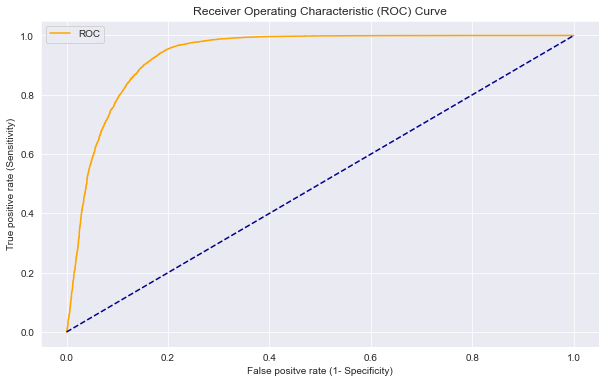


---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[ 9945   933]
 [ 1030 10021]]
classification report:                  precision    recall  f1-score   support

           0       0.91      0.91      0.91     10878
           1       0.91      0.91      0.91     11051

    accuracy                           0.91     21929
   macro avg       0.91      0.91      0.91     21929
weighted avg       0.91      0.91      0.91     21929

PPV:  90.61503416856492
NPV:  91.4825634471426


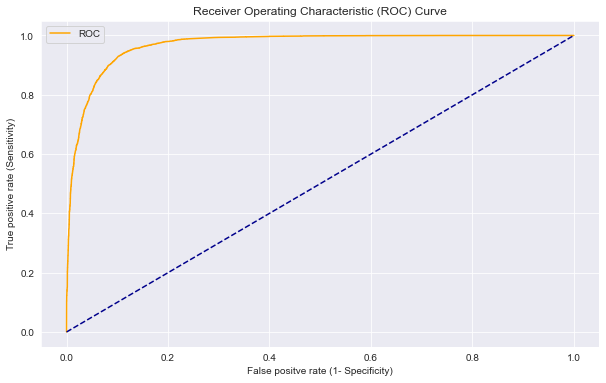


---------- GAUSSIANNB() --------

Confusion Matrix 
 [[8529 2562]
 [2446 8392]]
classification report:                  precision    recall  f1-score   support

           0       0.78      0.77      0.77     11091
           1       0.77      0.77      0.77     10838

    accuracy                           0.77     21929
   macro avg       0.77      0.77      0.77     21929
weighted avg       0.77      0.77      0.77     21929

PPV:  77.7129840546697
NPV:  76.61128354938835


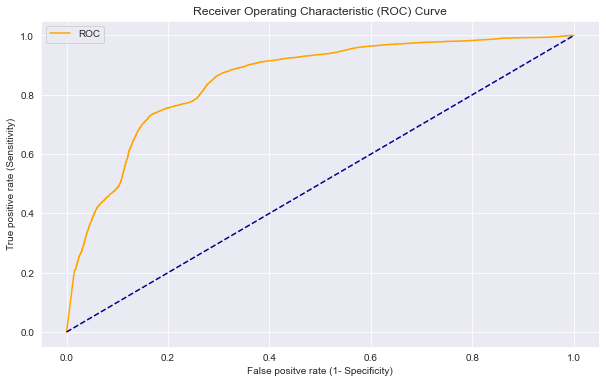


---------- KNEIGHBORSCLASSIFIER() --------

Confusion Matrix 
 [[ 9411   100]
 [ 1564 10854]]
classification report:                  precision    recall  f1-score   support

           0       0.86      0.99      0.92      9511
           1       0.99      0.87      0.93     12418

    accuracy                           0.92     21929
   macro avg       0.92      0.93      0.92     21929
weighted avg       0.93      0.92      0.92     21929

PPV:  85.749430523918
NPV:  99.08709147343436


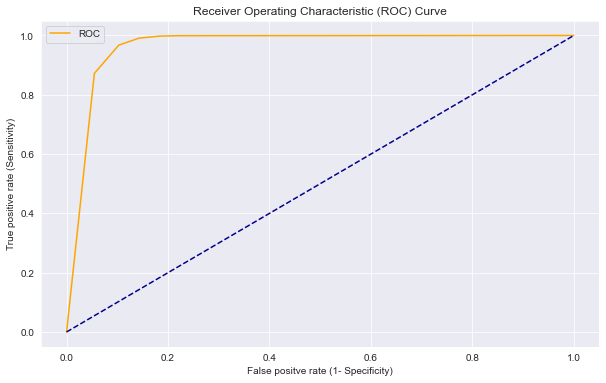


---------- SVC(PROBABILITY=TRUE) --------

Confusion Matrix 
 [[ 9310   458]
 [ 1665 10496]]
classification report:                  precision    recall  f1-score   support

           0       0.85      0.95      0.90      9768
           1       0.96      0.86      0.91     12161

    accuracy                           0.90     21929
   macro avg       0.90      0.91      0.90     21929
weighted avg       0.91      0.90      0.90     21929

PPV:  84.82915717539863
NPV:  95.81887894832937


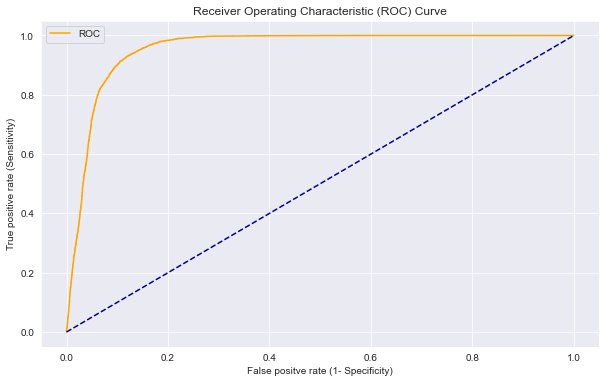

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base_Model,LogisticRegression(),0.928073,0.659624,0.395218,0.906935,0.446559,0.494283,"[[10645, 860], [290, 562]]",92.524989,65.962441
1,Base_Model,AdaBoostClassifier(),0.936526,0.675853,0.362166,0.906612,0.425477,0.471612,"[[10688, 907], [247, 515]]",92.177663,67.585302
2,Base_Model,GaussianNB(),0.844592,0.376315,0.578762,0.841143,0.367927,0.456082,"[[9571, 599], [1364, 823]]",94.110128,37.631459
3,Base_Model,KNeighborsClassifier(),0.847213,0.588171,0.377637,0.897953,0.406552,0.459957,"[[10559, 885], [376, 537]]",92.266690,58.817087
4,Base_Model,SVC(probability=True),0.892614,0.658537,0.360759,0.904912,0.418809,0.466152,"[[10669, 909], [266, 513]]",92.148903,65.853659
5,With OverS,LogisticRegression(),0.935667,0.860593,0.884791,0.870856,0.741719,0.872524,"[[9405, 1262], [1570, 9692]]",88.169120,86.059315
6,With OverS,AdaBoostClassifier(),0.969106,0.906796,0.914826,0.910484,0.820969,0.910793,"[[9945, 933], [1030, 10021]]",91.423056,90.679577
7,With OverS,GaussianNB(),0.850994,0.774313,0.766113,0.771627,0.543248,0.770191,"[[8529, 2562], [2446, 8392]]",76.900189,77.431260
8,With OverS,KNeighborsClassifier(),0.963782,0.874054,0.990871,0.924119,0.848257,0.928804,"[[9411, 100], [1564, 10854]]",98.948586,87.405379
9,With OverS,SVC(probability=True),0.955083,0.863087,0.958189,0.903188,0.806395,0.908155,"[[9310, 458], [1665, 10496]]",95.311220,86.308692


In [42]:
func('With OverSampling')

In [43]:
result_tab

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base_Model,LogisticRegression(),0.928073,0.659624,0.395218,0.906935,0.446559,0.494283,"[[10645, 860], [290, 562]]",92.524989,65.962441
1,Base_Model,AdaBoostClassifier(),0.936526,0.675853,0.362166,0.906612,0.425477,0.471612,"[[10688, 907], [247, 515]]",92.177663,67.585302
2,Base_Model,GaussianNB(),0.844592,0.376315,0.578762,0.841143,0.367927,0.456082,"[[9571, 599], [1364, 823]]",94.110128,37.631459
3,Base_Model,KNeighborsClassifier(),0.847213,0.588171,0.377637,0.897953,0.406552,0.459957,"[[10559, 885], [376, 537]]",92.266690,58.817087
4,Base_Model,SVC(probability=True),0.892614,0.658537,0.360759,0.904912,0.418809,0.466152,"[[10669, 909], [266, 513]]",92.148903,65.853659
5,With OverS,LogisticRegression(),0.935667,0.860593,0.884791,0.870856,0.741719,0.872524,"[[9405, 1262], [1570, 9692]]",88.169120,86.059315
6,With OverS,AdaBoostClassifier(),0.969106,0.906796,0.914826,0.910484,0.820969,0.910793,"[[9945, 933], [1030, 10021]]",91.423056,90.679577
7,With OverS,GaussianNB(),0.850994,0.774313,0.766113,0.771627,0.543248,0.770191,"[[8529, 2562], [2446, 8392]]",76.900189,77.431260
8,With OverS,KNeighborsClassifier(),0.963782,0.874054,0.990871,0.924119,0.848257,0.928804,"[[9411, 100], [1564, 10854]]",98.948586,87.405379
9,With OverS,SVC(probability=True),0.955083,0.863087,0.958189,0.903188,0.806395,0.908155,"[[9310, 458], [1665, 10496]]",95.311220,86.308692


# Feature selection using SequentialFeatureSelection

In [44]:
# initiate linear regression model to use in feature selection
RF = RandomForestClassifier()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
# 'n_jobs = -1' considers all the CPUs in the system to select the feattures
RF_forward = sfs(estimator = RF, k_features = 'best', forward = True, verbose = 2, scoring = 'f1', n_jobs = -1)

# fit the step forward selection on training data using fit()
# consider the log of sales price as the target variable
sfs_forward = RF_forward.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished

[2021-01-23 19:00:27] Features: 1/20 -- score: 0.910478951111967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  5.7min finished

[2021-01-23 19:06:12] Features: 2/20 -- score: 0.9164889460979573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.0min finished

[2021-01-23 19:11:11] Features: 3/20 -- score: 0.9086935134540118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  4.1min finished

[2021-01-23 19:15:15] Features: 4/20 -- score: 0.9233387345466456[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  4.0min finished

[

In [45]:
# print the number of selected features
print('Number of features selected using forward selection method:', len(sfs_forward.k_feature_names_))

# print a blank line
print('\n')

# print the selected feature names when k_features = 'best'
print('Features selected using forward selection method are: ')
print(sfs_forward.k_feature_names_)

Number of features selected using forward selection method: 15


Features selected using forward selection method are: 
('age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome')


In [46]:
X_resampled = X_resampled[['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week']]

In [47]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)


X_train  (51167, 17)
X_test  (21929, 17)
y_train  (51167,)
y_test  (21929,)


---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[9380 1331]
 [1595 9623]]
classification report:                  precision    recall  f1-score   support

           0       0.85      0.88      0.87     10711
           1       0.88      0.86      0.87     11218

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929

PPV:  85.46697038724373
NPV:  87.84918751141136


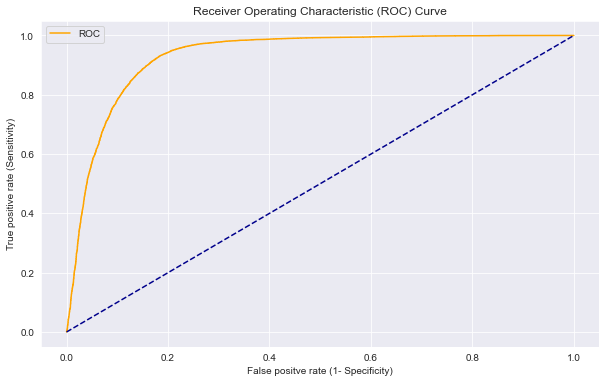


---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[ 9919   878]
 [ 1056 10076]]
classification report:                  precision    recall  f1-score   support

           0       0.90      0.92      0.91     10797
           1       0.92      0.91      0.91     11132

    accuracy                           0.91     21929
   macro avg       0.91      0.91      0.91     21929
weighted avg       0.91      0.91      0.91     21929

PPV:  90.37813211845102
NPV:  91.9846631367537


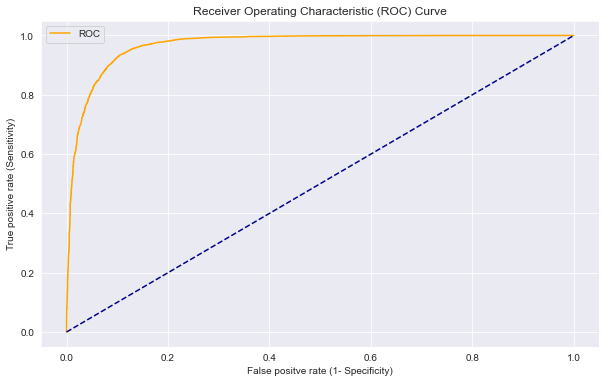


---------- GAUSSIANNB() --------

Confusion Matrix 
 [[9130 2737]
 [1845 8217]]
classification report:                  precision    recall  f1-score   support

           0       0.83      0.77      0.80     11867
           1       0.75      0.82      0.78     10062

    accuracy                           0.79     21929
   macro avg       0.79      0.79      0.79     21929
weighted avg       0.79      0.79      0.79     21929

PPV:  83.18906605922551
NPV:  75.01369362789849


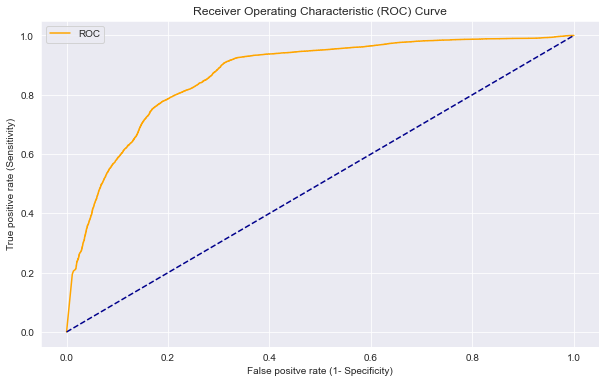


---------- KNEIGHBORSCLASSIFIER() --------

Confusion Matrix 
 [[ 9409   126]
 [ 1566 10828]]
classification report:                  precision    recall  f1-score   support

           0       0.86      0.99      0.92      9535
           1       0.99      0.87      0.93     12394

    accuracy                           0.92     21929
   macro avg       0.92      0.93      0.92     21929
weighted avg       0.93      0.92      0.92     21929

PPV:  85.73120728929385
NPV:  98.8497352565273


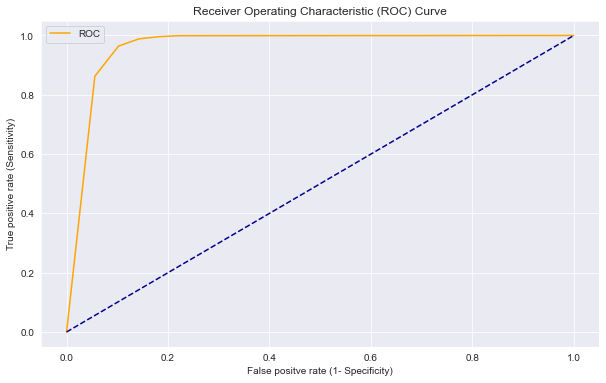


---------- SVC(PROBABILITY=TRUE) --------

Confusion Matrix 
 [[ 9329   486]
 [ 1646 10468]]
classification report:                  precision    recall  f1-score   support

           0       0.85      0.95      0.90      9815
           1       0.96      0.86      0.91     12114

    accuracy                           0.90     21929
   macro avg       0.90      0.91      0.90     21929
weighted avg       0.91      0.90      0.90     21929

PPV:  85.00227790432803
NPV:  95.563264560891


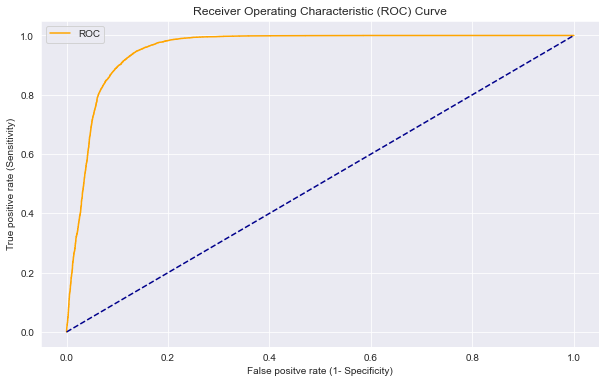

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base_Model,LogisticRegression(),0.928073,0.659624,0.395218,0.906935,0.446559,0.494283,"[[10645, 860], [290, 562]]",92.524989,65.962441
1,Base_Model,AdaBoostClassifier(),0.936526,0.675853,0.362166,0.906612,0.425477,0.471612,"[[10688, 907], [247, 515]]",92.177663,67.585302
2,Base_Model,GaussianNB(),0.844592,0.376315,0.578762,0.841143,0.367927,0.456082,"[[9571, 599], [1364, 823]]",94.110128,37.631459
3,Base_Model,KNeighborsClassifier(),0.847213,0.588171,0.377637,0.897953,0.406552,0.459957,"[[10559, 885], [376, 537]]",92.266690,58.817087
4,Base_Model,SVC(probability=True),0.892614,0.658537,0.360759,0.904912,0.418809,0.466152,"[[10669, 909], [266, 513]]",92.148903,65.853659
5,With OverS,LogisticRegression(),0.935667,0.860593,0.884791,0.870856,0.741719,0.872524,"[[9405, 1262], [1570, 9692]]",88.169120,86.059315
6,With OverS,AdaBoostClassifier(),0.969106,0.906796,0.914826,0.910484,0.820969,0.910793,"[[9945, 933], [1030, 10021]]",91.423056,90.679577
7,With OverS,GaussianNB(),0.850994,0.774313,0.766113,0.771627,0.543248,0.770191,"[[8529, 2562], [2446, 8392]]",76.900189,77.431260
8,With OverS,KNeighborsClassifier(),0.963782,0.874054,0.990871,0.924119,0.848257,0.928804,"[[9411, 100], [1564, 10854]]",98.948586,87.405379
9,With OverS,SVC(probability=True),0.955083,0.863087,0.958189,0.903188,0.806395,0.908155,"[[9310, 458], [1665, 10496]]",95.311220,86.308692


In [48]:
func('After Feature_Selection')

In [49]:
result_tab

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,Base_Model,LogisticRegression(),0.928073,0.659624,0.395218,0.906935,0.446559,0.494283,"[[10645, 860], [290, 562]]",92.524989,65.962441
1,Base_Model,AdaBoostClassifier(),0.936526,0.675853,0.362166,0.906612,0.425477,0.471612,"[[10688, 907], [247, 515]]",92.177663,67.585302
2,Base_Model,GaussianNB(),0.844592,0.376315,0.578762,0.841143,0.367927,0.456082,"[[9571, 599], [1364, 823]]",94.110128,37.631459
3,Base_Model,KNeighborsClassifier(),0.847213,0.588171,0.377637,0.897953,0.406552,0.459957,"[[10559, 885], [376, 537]]",92.266690,58.817087
4,Base_Model,SVC(probability=True),0.892614,0.658537,0.360759,0.904912,0.418809,0.466152,"[[10669, 909], [266, 513]]",92.148903,65.853659
5,With OverS,LogisticRegression(),0.935667,0.860593,0.884791,0.870856,0.741719,0.872524,"[[9405, 1262], [1570, 9692]]",88.169120,86.059315
6,With OverS,AdaBoostClassifier(),0.969106,0.906796,0.914826,0.910484,0.820969,0.910793,"[[9945, 933], [1030, 10021]]",91.423056,90.679577
7,With OverS,GaussianNB(),0.850994,0.774313,0.766113,0.771627,0.543248,0.770191,"[[8529, 2562], [2446, 8392]]",76.900189,77.431260
8,With OverS,KNeighborsClassifier(),0.963782,0.874054,0.990871,0.924119,0.848257,0.928804,"[[9411, 100], [1564, 10854]]",98.948586,87.405379
9,With OverS,SVC(probability=True),0.955083,0.863087,0.958189,0.903188,0.806395,0.908155,"[[9310, 458], [1665, 10496]]",95.311220,86.308692


In [55]:
from math import floor
df = bank.iloc[ : floor(bank.shape[0] * 80 /100), :]
df.count()

age               32950
job               32950
marital           32950
education         32950
default           32950
housing           32950
loan              32950
contact           32950
month             32950
day_of_week       32950
duration          32950
campaign          32950
pdays             32950
previous          32950
poutcome          32950
emp.var.rate      32950
cons.price.idx    32950
cons.conf.idx     32950
euribor3m         32950
nr.employed       32950
y                 32950
dtype: int64